# Caprini Lellouch Neubert (CLN) parametrization

The CLN parametrization is used to describe the semileptonic decay $B^0 \longrightarrow D^{*-}\ell^+ \nu_{\ell}$ $(\ell = e, \mu)$ and a one-dimensional projection of the differential decay rate into the variables $w$, $cos(\theta_{l})$, $cos(\theta_{\nu})$ and $\chi$ is calculated.


In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [5]:
#CLN Parametrization
def z(w):
    return ((w+1.)**0.5-2.**0.5)/((w+1.)**0.5+2.**0.5)

def hA1(w,rho2):
    #hA1_1 = 0.906
    hA1_1 = 1. #set to 1, hA1_1 is contained in the fit parameter Vcb
    return hA1_1*(1.-8.*rho2*z(w)+(53.*rho2-15.)*z(w)**2.-(231.*rho2-91.)*z(w)**3.)

def R1(w,R1_1):
    return R1_1-0.12*(w-1.)+0.05*(w-1.)**2.

def R2(w,R2_1):
    return R2_1+0.11*(w-1.)-0.06*(w-1.)**2.

def H0(w,para):
    rho2, R1_1, R2_1, Vcb = para
    mDs = 2.01
    mB = 5.279
    Rs = 2*np.sqrt(mB*mDs)/(mB+mDs)
    r = mDs/mB
    H0 = mB * Rs *(1.-r**2.) * (w+1.) /(2*np.sqrt(1.-2.*r*w+r**2)) *hA1(w,rho2)
    H0 = H0 * (1.+(1.-R2(w, R2_1))*(w-1.)/(1-r))
    return H0

def Hp(w,para):
    rho2, R1_1, R2_1, Vcb = para
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    Rs = 2*np.sqrt(mB*mDs)/(mB+mDs)
    r = mDs/mB
    Hp = mB * Rs *(1.-r**2.) * (w+1.) /(2*np.sqrt(1.-2.*r*w+r**2)) *hA1(w,rho2)
    Hp = Hp * np.sqrt(1.-2.*r*w+r**2.)/(1.-r) * (1.-R1(w,R1_1) * np.sqrt((w-1.)/(w+1.)))
    return Hp

def Hm(w,para):
    rho2, R1_1, R2_1, Vcb = para
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    Rs = 2*np.sqrt(mB*mDs)/(mB+mDs)
    r = mDs/mB
    Hp = mB * Rs *(1.-r**2.) * (w+1.) /(2*np.sqrt(1.-2.*r*w+r**2)) *hA1(w,rho2)
    Hp = Hp * np.sqrt(1.-2.*r*w+r**2.)/(1.-r) * (1.+R1(w,R1_1) * np.sqrt((w-1.)/(w+1.)))
    return Hp

#Term1 (1-cos(theta_l))^2
def l1(x):
    return (1-x)**2
#Integral
def Il1(a,b):
    return b-b**2.+b**3./3.-(a-a**2.+a**3./3.)

#Term2 (1+cos(theta_l))^2
def l2(x):
    return (1+x)**2
#Integral
def Il2(a,b):
    return b+b**2.+b**3./3.-(a+a**2.+a**3./3.)

#Term3 1-cos(theta_l)^2
def l3(x):
    return 1-x**2
#Integral
def Il3(a,b):
    return b-b**3./3.-(a-a**3./3.)

#Term4 1-cos(theta_l)^2
def l4(x):
    return 1-x**2
#Integral
def Il4(a,b):
    return b-b**3./3.-(a-a**3./3.)

#Term1 1-cos(theta_nu)^2
def n1(x):
    return 1-x**2
#Integral
def In1(a,b):
    return b-b**3./3.-(a-a**3./3.)

#Term2 1-cos(theta_nu)^2
def n2(x):
    return 1-x**2
#Integral
def In2(a,b):
    return b-b**3./3.-(a-a**3./3.)

#Term3 cos(theta_nu)^2
def n3(x):
    return x**2
#Integral
def In3(a,b):
    return b**3./3.-(a**3./3.)

#Term4 1-cos(theta_nu)^2
def n4(x):
    return 1-x**2
#Integral
def In4(a,b):
    return b-b**3./3.-(a-a**3./3.)

#Term1 1
def c1(x):
    return 1.
#Integral
def Ic1(a,b):
    return b-a

#Term2 1
def c2(x):
    return 1.
#Integral
def Ic2(a,b):
    return b-a

#Term3 1
def c3(x):
    return 1.
#Integral
def Ic3(a,b):
    return b-a

#Term4 cos(2*chi)
def c4(x):
    return np.cos(2.*x)
#Integral
def Ic4(a,b):
    return 0.5*np.sin(2.*b)-0.5*np.sin(2.*a)

#Term1 sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hp^2
def w1(w, para):
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*Hp(w,para)**2
#Integral
def Iw1(a,b,para):
    I = quad(w1, a, b, args=(para))
    return I[0]

#Term2 sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hm^2
def w2(w, para):
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*Hm(w,para)**2
#Integral
def Iw2(a,b,para):
    I = quad(w2, a, b, args=(para))
    return I[0]

#Term3 4*sqrt(w^2-1)*(1.-2.*w*r+r**2)*H0^2
def w3(w, para):
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return 4.*np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*H0(w,para)**2
#Integral
def Iw3(a,b,para):
    I = quad(w3, a, b, args=(para))
    return I[0]

#Term4 -2*sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hp*Hm
def w4(w, para):
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return -2.*np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*Hp(w,para)*Hm(w,para)
#Integral
def Iw4(a,b,para):
    I = quad(w4, a, b, args=(para))
    return I[0]

#Integral from cos(theta_l)=-1 to cos(theta_l)=1
Il = np.zeros(shape=(4))
Il[0]=Il1(-1.,1.) #term 1
Il[1]=Il2(-1.,1.) #term 2
Il[2]=Il3(-1.,1.) #term 3
Il[3]=Il4(-1.,1.) #term 4

#Integral from cos(theta_nu)=-1 to cos(theta_nu)=1
In = np.zeros(shape=(4))
In[0]=In1(-1.,1.) #term 1
In[1]=In2(-1.,1.) #term 2
In[2]=In3(-1.,1.) #term 3
In[3]=In4(-1.,1.) #term 4

#Integral from chi=-Pi to chi=Pi
Ic = np.zeros(shape=(4))
Ic[0]=Ic1(-np.pi,np.pi) #term 1
Ic[1]=Ic2(-np.pi,np.pi) #term 2
Ic[2]=Ic3(-np.pi,np.pi) #term 3
Ic[3]=Ic4(-np.pi,np.pi) #term 4

parameter: [1.166, 1.184, 0.848, 0.03648]


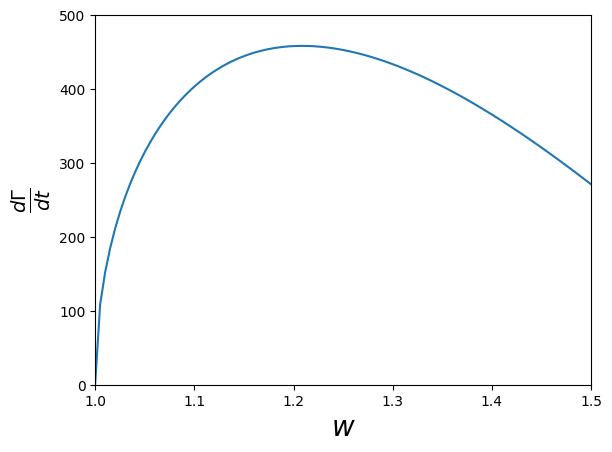

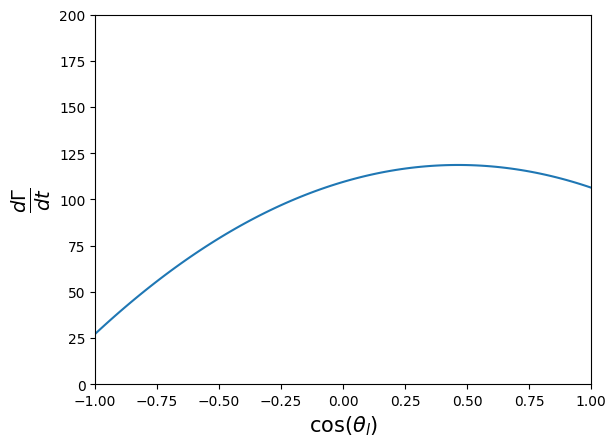

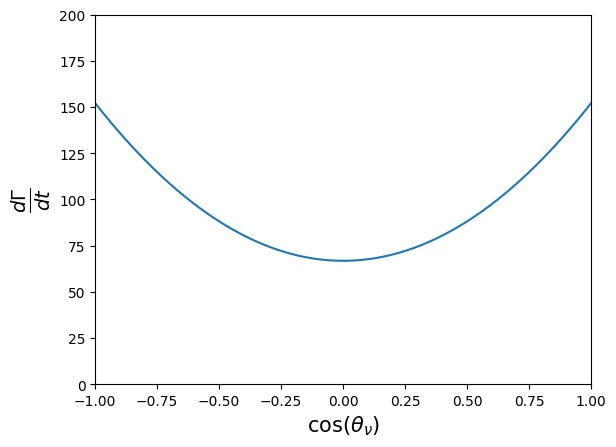

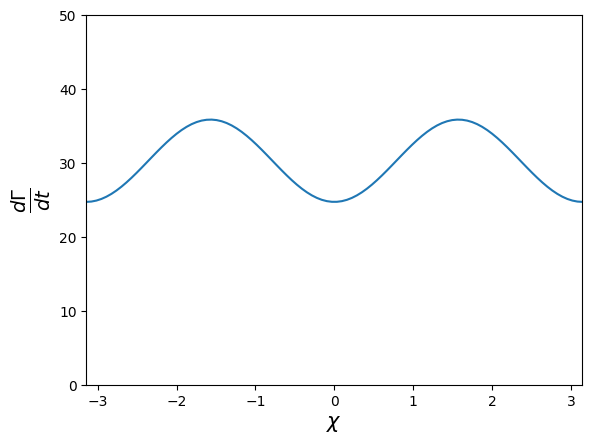

In [6]:
#four parameters: rho**2, R1(1), R2(1), Vcb*eta_EW*F(1)
para = [1.166, 1.184, 0.848, 0.03648]

#Integral from w=1. to w=1.5
Iw = np.zeros(shape=(4))
Iw[0]=Iw1(1.,1.5,para) #term 1
Iw[1]=Iw2(1.,1.5,para) #term 2
Iw[2]=Iw3(1.,1.5,para) #term 3
Iw[3]=Iw4(1.,1.5,para) #term 4

def W(x,para):
    W =     w1(x,para)*Il[0]*In[0]*Ic[0]
    W = W + w2(x,para)*Il[1]*In[1]*Ic[1]
    W = W + w3(x,para)*Il[2]*In[2]*Ic[2]
    W = W + w4(x,para)*Il[3]*In[3]*Ic[3]
    return W

def Cos_l(x):
    Cos_l =         Iw[0]*l1(x)*In[0]*Ic[0]
    Cos_l = Cos_l + Iw[1]*l2(x)*In[1]*Ic[1]
    Cos_l = Cos_l + Iw[2]*l3(x)*In[2]*Ic[2]
    Cos_l = Cos_l + Iw[3]*l4(x)*In[3]*Ic[3]
    return Cos_l

def Cos_nu(x):
    Cos_nu =          Iw[0]*Il[0]*n1(x)*Ic[0]
    Cos_nu = Cos_nu + Iw[1]*Il[1]*n2(x)*Ic[1]
    Cos_nu = Cos_nu + Iw[2]*Il[2]*n3(x)*Ic[2]
    Cos_nu = Cos_nu + Iw[3]*Il[3]*n4(x)*Ic[3]
    return Cos_nu

def Chi(x):
    Chi =       Iw[0]*Il[0]*In[0]*c1(x)
    Chi = Chi + Iw[1]*Il[1]*In[1]*c2(x)
    Chi = Chi + Iw[2]*Il[2]*In[2]*c3(x)
    Chi = Chi + Iw[3]*Il[3]*In[3]*c4(x)
    return Chi

print("parameter:",para)

x_w=np.linspace(1., 1.5, 100)
plt.plot(x_w, W(x_w,para))
plt.ylim(0., 500.)
plt.xlim(1., 1.5)
plt.xlabel(r'$w$', fontsize=20)
plt.ylabel(r'$\frac{d\Gamma}{dt}$', fontsize=20)
plt.show()

x_l=np.linspace(-1., 1., 100)
plt.plot(x_l, Cos_l(x_l))
plt.ylim(0., 200.)
plt.xlim(-1., 1.)
plt.xlabel(r'cos($\theta_l$)', fontsize=15)
plt.ylabel(r'$\frac{d\Gamma}{dt}$', fontsize=20)
plt.show()

x_nu=np.linspace(-1., 1., 100)
plt.plot(x_nu, Cos_nu(x_nu))
plt.ylim(0., 200.)
plt.xlim(-1., 1.)
plt.xlabel(r'cos($\theta_{\nu}$)', fontsize=15)
plt.ylabel(r'$\frac{d\Gamma}{dt}$', fontsize=20)
plt.show()

x_c=np.linspace(-np.pi,np.pi, 100)
plt.plot(x_c, Chi(x_c))
plt.ylim(0.,50.)
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'$\chi$', fontsize=15)
plt.ylabel(r'$\frac{d\Gamma}{dt}$', fontsize=20)
plt.show()